In [1]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

In [2]:
#delta  =  V+ - V-/ uS - dS
# V = (V- - delta*dS + delta*S*e^r*t)/e^(r*t)

#Using delta hedge strategy at each node to price
def euro_price(N, T, S, K, r, sigma):
    del_t = T / N
    u = math.exp(sigma*math.sqrt(del_t))
    stock = [[S], [S/u, S*u]]
    while(N > 0):
        temp = []
        for i in range(len(stock[-1])):
            temp.append(stock[-1][i]/u)
        temp.append(stock[-1][-1]*u)
        stock.append(temp)
        N -= 1
    euro_call = copy.deepcopy(stock)
    for i in range(len(euro_call[-1])):
        euro_call[-1][i] = max(euro_call[-1][i] - K, 0)
        t = len(euro_call) - 2
    while(t>0):
        for i in range(1, len(euro_call[t])):
            delta = (euro_call[t+1][i] - euro_call[t+1][i-1])/(stock[t+1][i] - stock[t+1][i-1])
            euro_call[t][i-1] = max((euro_call[t+1][i-1] - delta*stock[t+1][i-1] + delta*stock[t][i-1]*math.exp(r*del_t))/math.exp(r*del_t), 0)
        euro_call[t][-1] = max((euro_call[t+1][-2] - delta*stock[t+1][-2] + delta*stock[t][-1]*math.exp(r*del_t))/math.exp(r*del_t), 0)
        t -= 1
    delta = (euro_call[1][1] - euro_call[1][0])/(stock[1][1] - stock[1][0])
    euro_call[0][-1] = max((euro_call[1][0] - delta*stock[1][0] + delta*stock[0][0]*math.exp(r*del_t))/math.exp(r*del_t), 0)
    return euro_call[0][-1]    
euro_price(198, 1, 80, 75, 0.05, 0.2)


11.31531029932917

In [3]:
def american_put_price(N, T, S , K, r, sigma):
    del_t = T / N
    u = math.exp(sigma*math.sqrt(del_t))
    stock = [[S], [S/u, S*u]]
    while(N > 0):
        temp = []
        for i in range(len(stock[-1])):
            temp.append(stock[-1][i]/u)
        temp.append(stock[-1][-1]*u)
        stock.append(temp)
        N -= 1
    american_put = copy.deepcopy(stock)
    for i in range(len(american_put[-1])):
        american_put[-1][i] = max(K - american_put[-1][i], 0)
    #Same code as european call, but for put
    t = len(american_put) - 2
    while(t>0):
        for i in range(1, len(american_put[t])):
            delta = (american_put[t+1][i] - american_put[t+1][i-1])/(stock[t+1][i] - stock[t+1][i-1])
            american_put[t][i-1] = max((american_put[t+1][i-1] - delta*stock[t+1][i-1] + delta*stock[t][i-1]*math.exp(r*del_t))/math.exp(r*del_t), K - stock[t][i-1])
        american_put[t][-1] = max((american_put[t+1][-2] - delta*stock[t+1][-2] + delta*stock[t][-1]*math.exp(r*del_t))/math.exp(r*del_t), K - stock[t][-1])
        t -= 1
    delta = (american_put[1][1] - american_put[1][0])/(stock[1][1] - stock[1][0])
    american_put[0][-1] = max((american_put[1][0] - delta*stock[1][0] + delta*stock[0][0]*math.exp(r*del_t))/math.exp(r*del_t), K - stock[0][-1])
    return american_put[0][-1]
american_put_price(198, 1, 80, 75, 0.05, .20)

    

2.8447308483708573

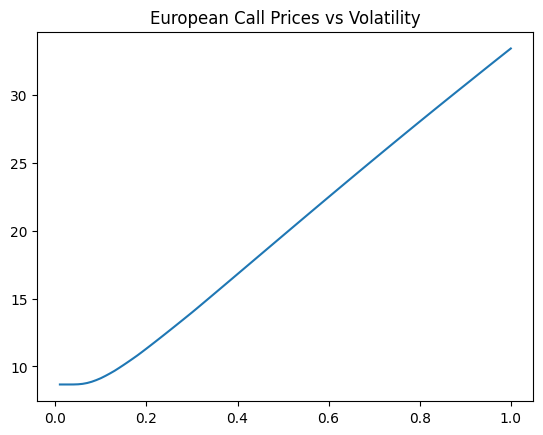

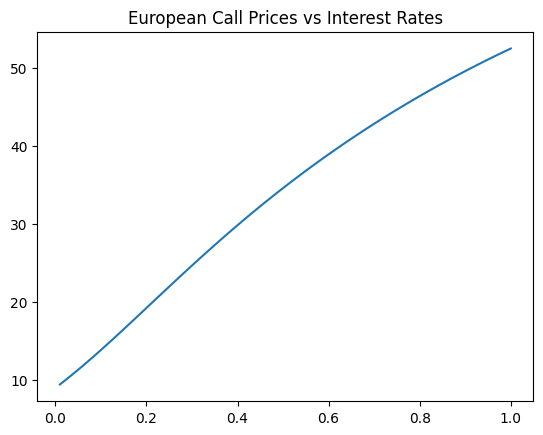

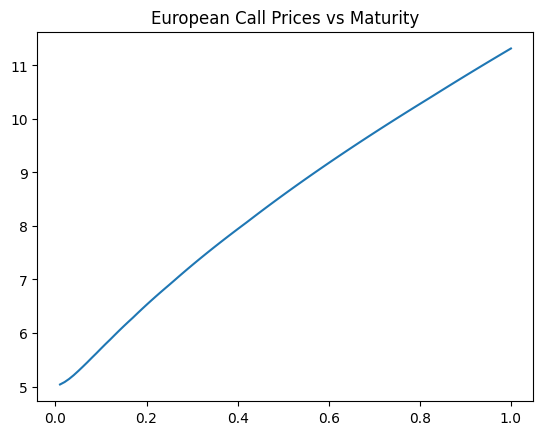

In [4]:
#Changing sigma
sigma_vec = np.linspace(0.01,1,100)
prices = list()
for i in sigma_vec:
    prices.append(euro_price(198,1,80,75,0.05,i))
plt.plot(sigma_vec, prices)
plt.title("European Call Prices vs Volatility")
plt.show()


#Changing r
r = np.linspace(0.01,1,100)
prices = list()
for i in r:
    prices.append(euro_price(198,1,80,75,i,0.2))
plt.plot(r, prices)
plt.title("European Call Prices vs Interest Rates")
plt.show()

#Changing T
T = np.linspace(0.01,1,100)
prices = list()
for i in T:
    prices.append(euro_price(198,i,80,75,0.05,0.2))
plt.plot(T, prices)
plt.title("European Call Prices vs Maturity")
plt.show()

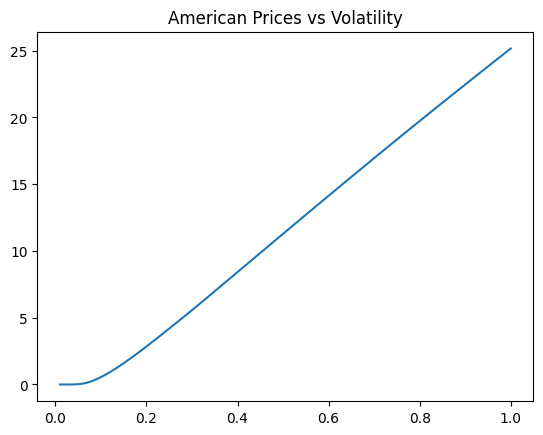

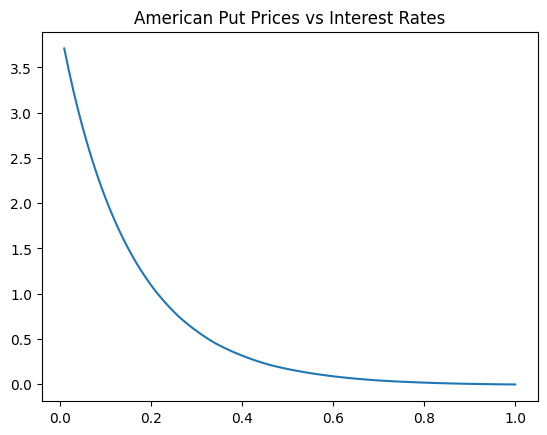

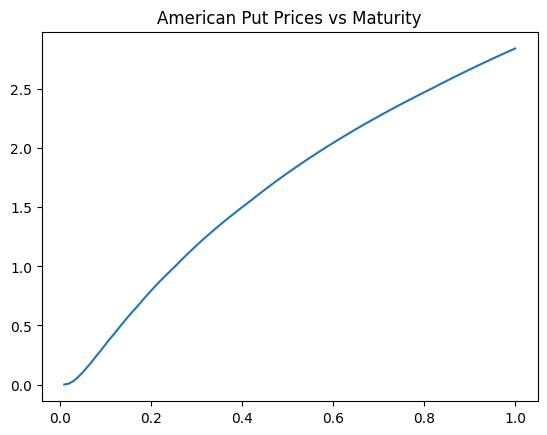

The interpretation of these terms is the sensitivity of the option with respect to the change. For example, the slope of the american prices vs volatility would give you vega, while the change in interest rates would give you rho.


In [8]:
#Changing American Put sigma
sigma_vec = np.linspace(0.01,1,100)
prices = list()
for i in sigma_vec:
    prices.append(american_put_price(198,1,80,75,0.05,i))
plt.plot(sigma_vec, prices)
plt.title("American Prices vs Volatility")
plt.show()

#Changing r
r = np.linspace(0.01,1,100)
prices = list()
for i in r:
    prices.append(american_put_price(198,1,80,75,i,0.2))
plt.plot(r, prices)
plt.title("American Put Prices vs Interest Rates")
plt.show()

#Changing T
T = np.linspace(0.01,1,100)
prices = list()
for i in T:
    prices.append(american_put_price(198,i,80,75,0.05,0.2))
plt.plot(T, prices)
plt.title("American Put Prices vs Maturity")
plt.show()

print("The interpretation of these terms is the sensitivity of the option with respect to the change in option price. For example, the slope of the american prices vs volatility would give you vega, while the change in interest rates would give you rho.")

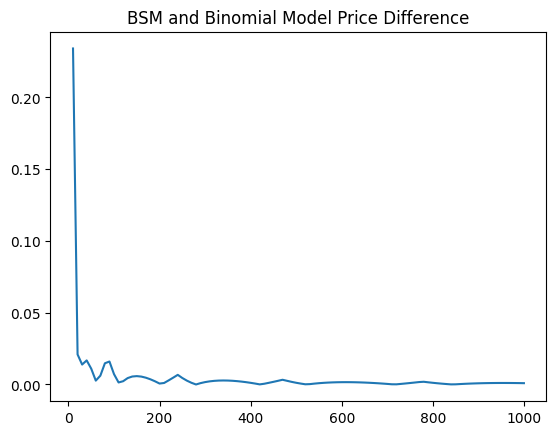

The k and alpha parameters are: 201.4743561923693 and 2.9361637012016346 
Note: the alpha parameter corresponds to 1/x, so this would be -alpha on a non negative polynomial


In [6]:
#Question 2
#Just take difference between european call and BSM
S = 80
K = 75
r = 0.05
T = 1
sigma = 0.2
N = np.linspace(10,1000, 100)
d1 = (math.log(S/K) + (r + sigma*sigma/2)*T)/(sigma*math.sqrt(T))
d2 = d1 - sigma*math.sqrt(T)
diff = list()
for i in N:
    euro_call = euro_price(i,T,S,K,r,sigma)
    diff.append(abs((S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)) - euro_call))
plt.plot(N, diff)
plt.title("BSM and Binomial Model Price Difference")
plt.show()
def test(x, k, alpha):
    return k*(x)**alpha
coefficients, covariance = scipy.optimize.curve_fit(test, T/N, diff)
print(f"The k and alpha parameters are: {coefficients[0]} and {coefficients[1]} ")
print("Note: the alpha parameter corresponds to 1/x, so this would be -alpha on a non negative polynomial")

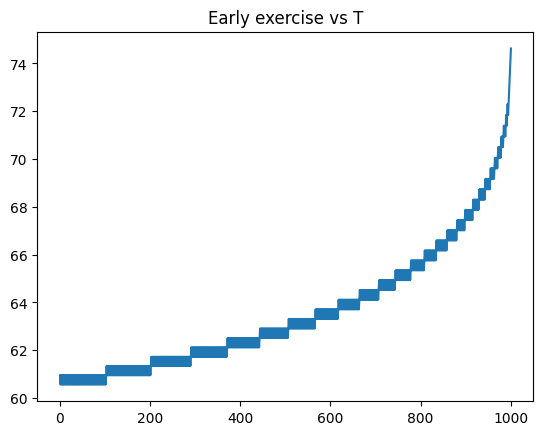

In [7]:
#Question 3
def boundary(N, T, S , K, r, sigma):
    del_t = T / N
    u = math.exp(sigma*math.sqrt(del_t))
    stock = [[S], [S/u, S*u]]
    while(N > 0):
        temp = []
        for i in range(len(stock[-1])):
            temp.append(stock[-1][i]/u)
        temp.append(stock[-1][-1]*u)
        stock.append(temp)
        N -= 1
    american_put = copy.deepcopy(stock)
    for i in range(len(american_put[-1])):
        american_put[-1][i] = max(K - american_put[-1][i], 0)
    #Same code as european call, but for put
    t = len(american_put) - 2
    while(t>0):
        for i in range(1, len(american_put[t])):
            delta = (american_put[t+1][i] - american_put[t+1][i-1])/(stock[t+1][i] - stock[t+1][i-1])
            american_put[t][i-1] = max((american_put[t+1][i-1] - delta*stock[t+1][i-1] + delta*stock[t][i-1]*math.exp(r*del_t))/math.exp(r*del_t), K - stock[t][i-1])
        american_put[t][-1] = max((american_put[t+1][-2] - delta*stock[t+1][-2] + delta*stock[t][-1]*math.exp(r*del_t))/math.exp(r*del_t), K - stock[t][-1])
        t -= 1
    delta = (american_put[1][1] - american_put[1][0])/(stock[1][1] - stock[1][0])
    american_put[0][-1] = max((american_put[1][0] - delta*stock[1][0] + delta*stock[0][0]*math.exp(r*del_t))/math.exp(r*del_t), K - stock[0][-1])
    return american_put, stock

put, stock = boundary(1000,1, 80, 75, 0.05, 0.2)
store = []
K = 75
t = len(put) - 1
while(t>0):
        temp =  []
        for i in range(len(put[t])):
            if(put[t][i] <= K - stock[t][i]):
                temp.append(stock[t][i])
        if(len(temp) != 0):
            store.append(max(temp))
        t -= 1
store.reverse()
time = np.linspace(1,1000,len(store))
plt.plot(time, store)
plt.title("Early exercise vs T")
plt.show()
